# Fruits Classification

**Problem Statement:**
“Identify the fruit class, given an image showing the fruit.”

**Proposed Solution:**
The proposed solution to this problem is to develop a deep learning model capable of identifying and classifying fruit images. We will use **AlexNet**, an eight-layered convolution network, in this project.

In [2]:
# libraries
import numpy as np
import pandas as pd 
import os,warnings
warnings.filterwarnings("ignore")
from tqdm.keras import TqdmCallback

from PIL import Image 
from skimage.io import imread
import imageio
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from keras.utils import load_img,img_to_array
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout

In [3]:
## Defining batch specfications
batch_size = 256
img_height = 250
img_width = 250

In [4]:
# load training & validation data
train_folder = r'C:\Users\Maroof\Desktop\Alex\Fruits Classification\train'
training_data = tf.keras.preprocessing.image_dataset_from_directory(train_folder,seed=42,image_size= (img_height, img_width),batch_size=batch_size)

val_folder = r'C:\Users\Maroof\Desktop\Alex\Fruits Classification\valid'
validation_data = tf.keras.preprocessing.image_dataset_from_directory(val_folder,seed=42,image_size= (img_height, img_width),batch_size=batch_size)

Found 3000 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [5]:
# target class name list
target_names = training_data.class_names
print(target_names)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


### AlexNet Architecture

A CNN architecture named AlexNet was chosen as the 2012 LSVRC competition winner. Research teams compete to attain higher accuracy on various visual recognition tasks in the Large Scale Visual Recognition Challenge by evaluating their algorithms on a sizable dataset of annotated images (ImageNet). There are over 1.2 million training images, 50,000 validation images, and 150,000 testing images. By removing the central 256×256 patch from each image, the model builders imposed a fixed size of 256×256 pixels. AlexNet’s architecture consists of 8 convolutional layers, of which 5 convolutional layers and three ANN layers. Each of the convolution layers is followed by a max pooling layer. Its architecture is easy to understand. It uses ReLu activation and involves overlapping max pooling.

Features of AlexNet:

* Kernels in the 2nd, 4th, and 5th convolution layers are interlinked to those kernels in the previous layers that lie on the same GPU.
* The neurons present in the fully connected layers are interconnected with each other.
* ReLu activation is applied to the output of every convolution layer and in the simple artificial neural network structure.


**ReLu Activation in AlexNet:**
Usually, the sigmoid or tanh function is used as an activation function in deep learning networks. However, AlexNet employs a non-linear activation function called Rectified Linear Unit activation. The former activation functions saturate quickly, and training on GPUs using these functions is not easy, so non-linearity in ReLu helps with effective learning.


**Issues with AlexNet:**
Since the original architecture of AlexNet was developed using large amounts of data, overfitting is a problem when using this CNN. Data augmentation and dropout techniques were used to overcome this problem. By using dropout layers, the performance of the CNN architecture was seen to improve. The dropped attributes do not participate in forward and backward propagation, which reduces the complex co-adaptations of neurons. This allows the network to learn more robust features. Dropout is used in the first two layers in the fully connected structure of AlexNet.

In [6]:
# AlexNet Architecture
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (250, 250, 3),kernel_size = (11, 11), strides = (4, 4),padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Flattening
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape = (250*250*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Softmax Layer
model.add(Dense(len(target_names)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 60, 60, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,144,965 (103.55 MB)

 Trainable params: 27,125,829 (103.48 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [7]:
# model compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# train the model
K.clear_session()
fruit_class_model = model.fit(training_data,validation_data= validation_data,epochs = 30, verbose=1)

# save model
model.save("/kaggle/working/AlexNetFruitClassifyModel.hdf5")


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 196s 16s/step - accuracy: 0.3001 - loss: 4.4044 - val_accuracy: 0.2000 - val_loss: 3437.3887
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 208s 18s/step - accuracy: 0.4621 - loss: 1.6760 - val_accuracy: 0.2050 - val_loss: 596.8703
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 210s 18s/step - accuracy: 0.5028 - loss: 1.2986 - val_accuracy: 0.2450 - val_loss: 430.4597
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 207s 17s/step - accuracy: 0.5207 - loss: 1.2411 - val_accuracy: 0.2500 - val_loss: 147.3915
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 209s 18s/step - accuracy: 0.5639 - loss: 1.1016 - val_accuracy: 0.2300 - val_loss: 74.3943
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 207s 17s/step - accuracy: 0.5942 - loss: 1.0315 - val_accuracy: 0.2700 - val_loss: 38.1465
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 207s 18s/step - accuracy: 0.5796 - loss: 1.0618 - val_accuracy: 0.2500 - val_loss: 40.8029
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 211s 18s/step - accuracy: 0.6080 - loss: 0.9920 - val

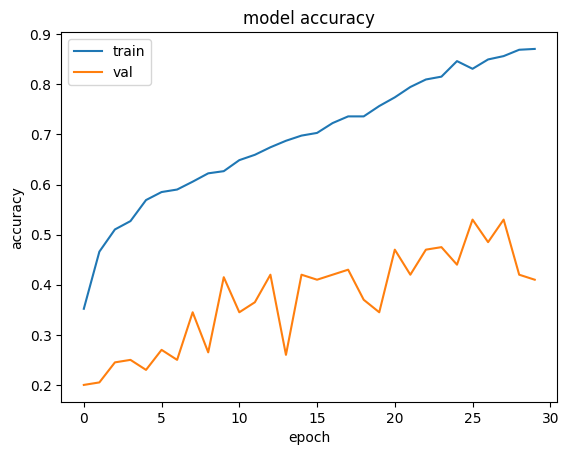

In [9]:
# plot the accuracy plot
plt.plot(fruit_class_model.history['accuracy'])
plt.plot(fruit_class_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
# custom function - prediction
def run(source = None):
    model = tf.keras.models.load_model('/kaggle/working/AlexNetFruitClassifyModel.hdf5')
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((250, 250))
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    #x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])
    
# make prediction on unseen data
run(source='/kaggle/input/fruits-classification/Fruits Classification/test/Strawberry/Strawberry (1132).jpeg')

FileNotFoundError: No such file: 'c:\kaggle\input\fruits-classification\Fruits Classification\test\Strawberry\Strawberry (1132).jpeg'